In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import sys
import seaborn as sns
sys.path.append('../creme/')
import utils
import pandas as pd
import numpy as np


2024-02-27 10:13:58.864580: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
summary_dfs = pd.read_csv('../results/summary_csvs/enformer/coverage_profiles.csv', index_col='Unnamed: 0')

In [4]:
pdf_dir = utils.make_dir(f'pdfs/coverage_profiles/')

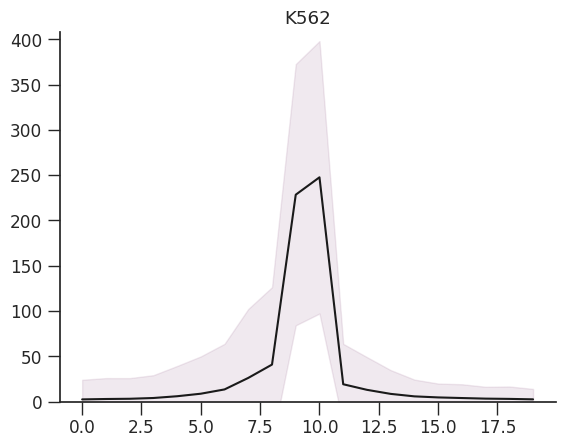

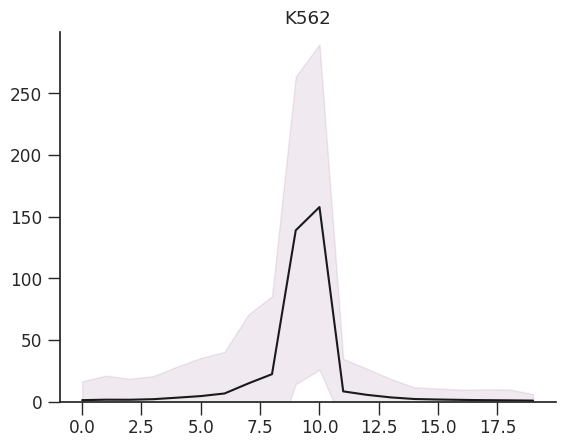

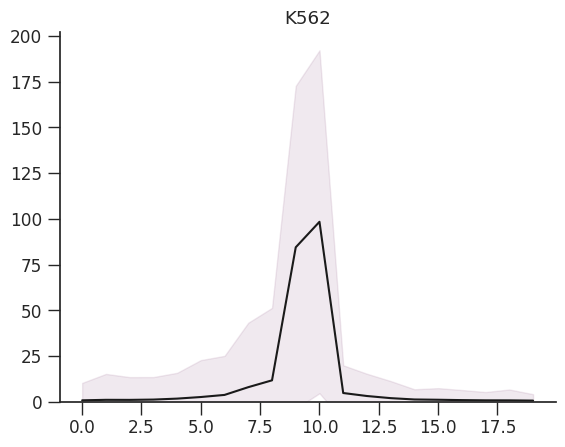

In [7]:
sns.set(font_scale = 1.1)
sns.set_style(style='white')
plt.rcParams['xtick.major.size'] = 9
plt.rcParams['xtick.major.width'] = 1

plt.rcParams['ytick.major.size'] = 9
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
for cell_line, cell_df in summary_dfs.groupby('cell_line'):

    center_coverage = cell_df['mean']
    std = cell_df['std']
    fig, ax = plt.subplots(1)
    plt.plot(center_coverage, color='k')
    plt.fill_between(range(center_coverage.shape[0]), center_coverage-std, center_coverage+std, color='#702963', alpha=0.1)
    plt.ylim(0, (center_coverage+std).max()+10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.title(cell_line_names[i])
    fig.savefig(f'{pdf_dir}/{cell_line}.pdf')
